## Team project:  Student performance analysis

### Import necessary libraries and load data sets to pandas DataFrame.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix

from sklearn.svm import LinearSVR
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import ShuffleSplit
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn import neighbors
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier


from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
# Load data for subject "Math".
math = pd.read_csv('student/student-mat.csv', sep=";")
print(math.shape)  # (395, 33)
# add an extra column ['subject] to math DataFrame.
math.insert(1, 'subject', ['math'] * 395)

(395, 33)


In [3]:
# Load data for subject "Portuguese".
portuguese = pd.read_csv('student/student-por.csv', sep=";")
print(portuguese.shape)  # (649, 33)
# add an extra column ['subject] to portuguese dataframe.
portuguese.insert(1, 'subject', ['por'] * 649)

(649, 33)


In [4]:
# Concatenate both DataFrame vertically
students = pd.concat([math, portuguese])
# Check and make sure the concatenation is correct
assert math.shape[0] + portuguese.shape[0] == students.shape[0], 'merge error'
assert math.shape[1] == portuguese.shape[1] == students.shape[1], 'merge error'

### Check the DataFrame

In [5]:
students.shape

(1044, 34)

In [6]:
students.head() # column 'subject' has been inserted. 

,school,subject,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,math,F,18,U,GT3,A,4,4,at_home,...,4,3,4,1,1,3,6,5,6,6
1,GP,math,F,17,U,GT3,T,1,1,at_home,...,5,3,3,1,1,3,4,5,5,6
2,GP,math,F,15,U,LE3,T,1,1,at_home,...,4,3,2,2,3,3,10,7,8,10
3,GP,math,F,15,U,GT3,T,4,2,health,...,3,2,2,1,1,5,2,15,14,15
4,GP,math,F,16,U,GT3,T,3,3,other,...,4,3,2,1,2,5,4,6,10,10


In [7]:
students.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000
mean,16.726054,2.603448,2.387931,1.522989,1.970307,0.264368,3.935824,3.201149,3.156130,1.494253,2.284483,3.543103,4.434866,11.213602,11.246169,11.341954
std,1.239975,1.124907,1.099938,0.731727,0.834353,0.656142,0.933401,1.031507,1.152575,0.911714,1.285105,1.424703,6.210017,2.983394,3.285071,3.864796
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,9.000000,9.000000,10.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [8]:
students.info() # No data missing, but some columns data type are object (text), data cleansing needed before ML. 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1044 entries, 0 to 648
Data columns (total 34 columns):
school        1044 non-null object
subject       1044 non-null object
sex           1044 non-null object
age           1044 non-null int64
address       1044 non-null object
famsize       1044 non-null object
Pstatus       1044 non-null object
Medu          1044 non-null int64
Fedu          1044 non-null int64
Mjob          1044 non-null object
Fjob          1044 non-null object
reason        1044 non-null object
guardian      1044 non-null object
traveltime    1044 non-null int64
studytime     1044 non-null int64
failures      1044 non-null int64
schoolsup     1044 non-null object
famsup        1044 non-null object
paid          1044 non-null object
activities    1044 non-null object
nursery       1044 non-null object
higher        1044 non-null object
internet      1044 non-null object
romantic      1044 non-null object
famrel        1044 non-null int64
freetime      1044 non-nul

In [9]:
# Sort out the all the column names with data type object 
text_columns = []
dataTypeDict = dict(students.dtypes)
for col in dataTypeDict: 
    if dataTypeDict[col] == 'O': 
        text_columns.append(col)
text_columns

['school',
 'subject',
 'sex',
 'address',
 'famsize',
 'Pstatus',
 'Mjob',
 'Fjob',
 'reason',
 'guardian',
 'schoolsup',
 'famsup',
 'paid',
 'activities',
 'nursery',
 'higher',
 'internet',
 'romantic']

In [10]:
# convert all the two-answers categorical features to integers: (Mjob, Fjob, reason, guardian, needs one-hot-encoding method to convert into numerical data)
students['school'] = students['school'].map({'GP':0, "MS":1})
students['subject'] = students['subject'].map({'math':0, "por":1})
students['sex'] = students['sex'].map({'F':0, "M":1})
students['address'] = students['address'].map({'U':0, "R":1})
students['famsize'] = students['famsize'].map({'GT3':0, "LE3":1})
students['Pstatus'] = students['Pstatus'].map({'A':0, "T":1})
students['schoolsup'] = students['schoolsup'].map({'no':0, "yes":1})
students['famsup'] = students['famsup'].map({'no':0, "yes":1})
students['paid'] = students['paid'].map({'no':0, "yes":1})
students['activities'] = students['activities'].map({'no':0, "yes":1})
students['nursery'] = students['nursery'].map({'no':0, "yes":1})
students['higher'] = students['higher'].map({'no':0, "yes":1})
students['internet'] = students['internet'].map({'no':0, "yes":1})
students['romantic'] = students['romantic'].map({'no':0, "yes":1})
# Recheck the dtypes
students.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1044 entries, 0 to 648
Data columns (total 34 columns):
school        1044 non-null int64
subject       1044 non-null int64
sex           1044 non-null int64
age           1044 non-null int64
address       1044 non-null int64
famsize       1044 non-null int64
Pstatus       1044 non-null int64
Medu          1044 non-null int64
Fedu          1044 non-null int64
Mjob          1044 non-null object
Fjob          1044 non-null object
reason        1044 non-null object
guardian      1044 non-null object
traveltime    1044 non-null int64
studytime     1044 non-null int64
failures      1044 non-null int64
schoolsup     1044 non-null int64
famsup        1044 non-null int64
paid          1044 non-null int64
activities    1044 non-null int64
nursery       1044 non-null int64
higher        1044 non-null int64
internet      1044 non-null int64
romantic      1044 non-null int64
famrel        1044 non-null int64
freetime      1044 non-null int64
goout 

### Data visualization 

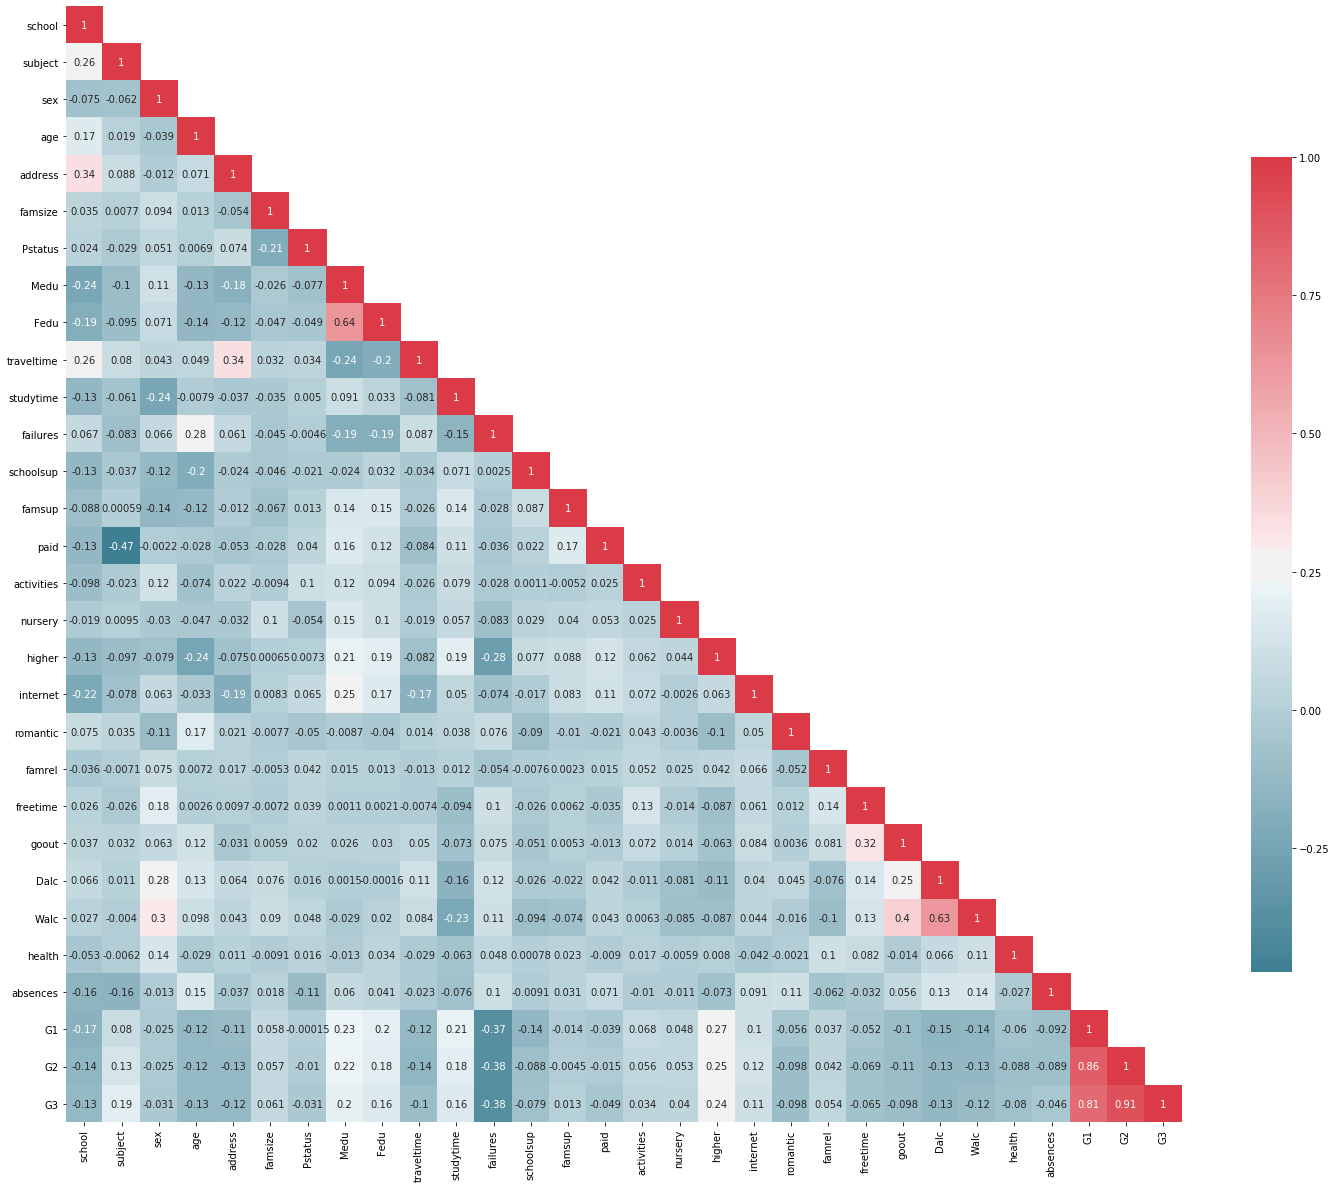

In [11]:
# Plotting the heatmap (missing Mjob, Fjob, reason, guardian)
fig, ax = plt.subplots(figsize=(25, 25))                  

cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )  # color map

# Numpy’s tril() function to extract Lower Triangle Matrix
df_lt = students.corr().where(np.tril(np.ones(students.corr().shape)).astype(np.bool))

# plotting the heatmap 
sns.heatmap(data      = df_lt, 
            cmap      = cmap, 
            square    = True, 
            cbar_kws  = {'shrink': .6}, 
            annot     = True, 
            annot_kws = {'fontsize': 10},
            ax        = ax
           )
plt.show()


### Interesting findings of Heatmap: 
1. G1 and G2 and failures are the most 3 related features to final grade G3. 
2. Mother's education is very much related with father's education. 
3. Beside the G1 and G2 and failures, we can see the other Top10 influence factors to target G3 are: higher:0.24, Medu:0.2, Fedu:0.16, studytime:0.16, age:-0.13, Dalc:-0.13, address:-0.12, Walc: -0.12, internet:0.11, traveltime: -0.1.
4. walc and goout has high relation. 
5. traveltime and address has high relation. 
6. paid and subject has high negtive relation. 
7. Internet has a positive relation to target G3. 
8. sex, Pstatus, schoolsup, famsup, paid, nursery, romantic, famrel, health, absences (These factors are surpriseingly showing us the grade is not much related to them, which is contrary to our usual perception: family support, school support or extra classes paid should greatly help to improve grades but not as hoped. However, as we usually worried Early school love, poor health and often absences must affect grades but they do not really lead to a decline in grades. 

`So let's visualize these findings by plotting them :)`

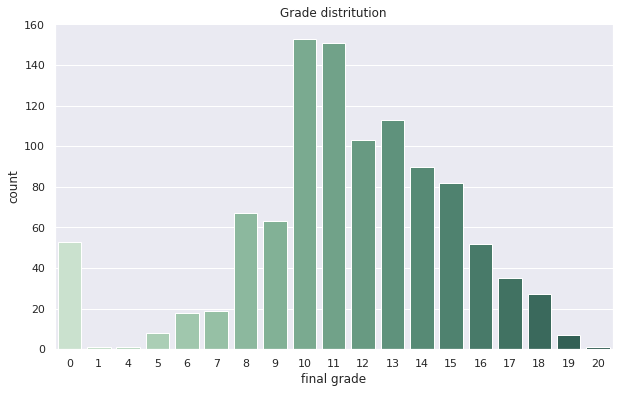

In [12]:
# countplot to review G3 distritution 

plt.figure(figsize=(10, 6))
sns.set()
sns.countplot('G3', data=students, palette=("ch:2.5,-.2,dark=.3"))
plt.title('Grade distritution')
plt.xlabel('final grade')
plt.show()

Above plot shows that the grades of the students conform to the normal distribution. However there are a bit too much the students whose grade is only 0. It might be because of cheating when doing exam. 

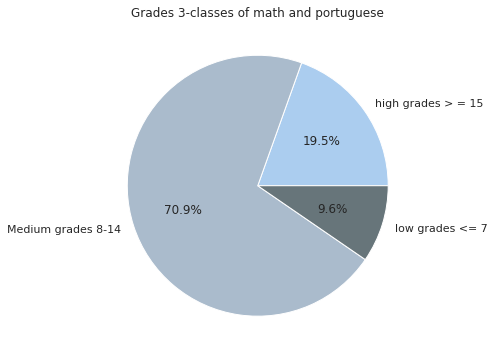

In [13]:
# let's class our grades (high:>=15, mid:8-14, low:<=7)
high = students.loc[students['G3'] >= 15].count()[0]
medium = students.loc[(students['G3'] >= 8) & (students['G3'] <=14)].count()[0]
low = students.loc[students['G3'] <= 7].count()[0]

# pieplot
plt.figure(figsize=(10, 6))
labels = ['high grades > = 15', 'Medium grades 8-14', 'low grades <= 7']
colors = ['#abcdef', '#aabbcc', '#67757a']
plt.pie([high,medium,low], labels=labels, colors=colors, autopct='%1.1f%%', shadow=False)
plt.title('Grades 3-classes of math and portuguese')
plt.show()

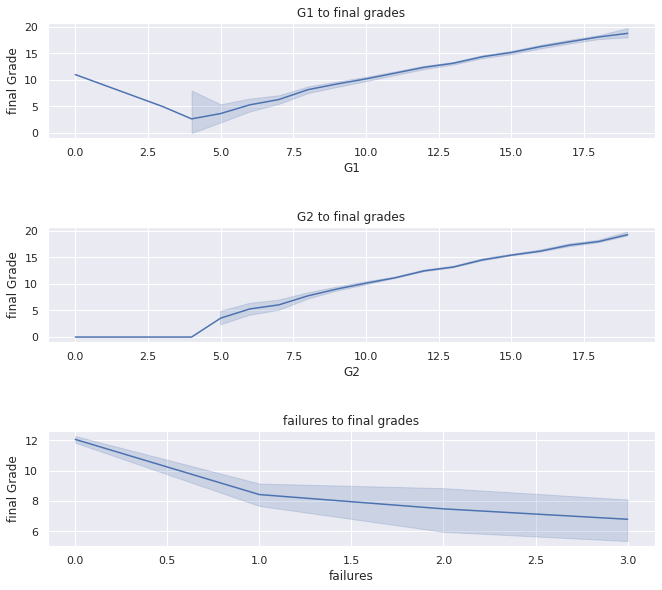

In [14]:
# lineplot on G1/G2/failures to G3 

fig, ax = plt.subplots(3,1,figsize=(10, 9))
sns.set()
index = 0
for col in ['G1', 'G2', 'failures']: 
    sns.lineplot(col, 'G3', data=students, ax=ax[index])
    ax[index].set_title(col + ' to final grades')
    ax[index].set_xlabel(col)
    ax[index].set_ylabel('final Grade')
    index+=1 
fig.tight_layout(pad=3.0)

These 3 plottings demostrate that: Students' academic performance continues to be stable. 
It means students with good results will continue to perform well and vice versa. 

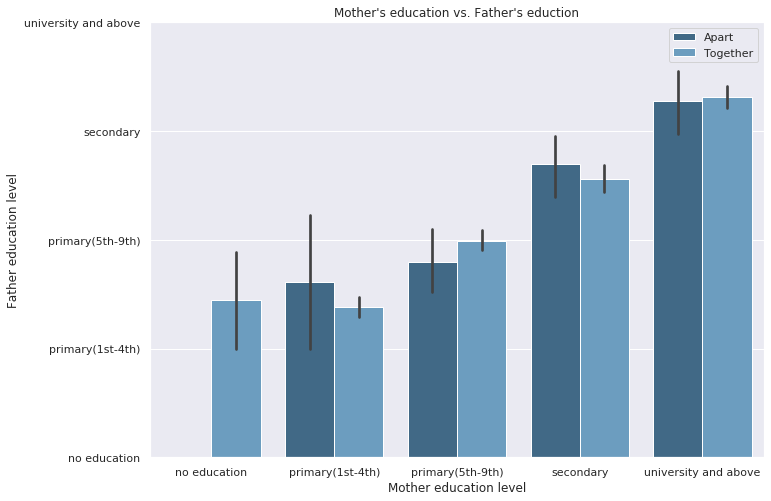

In [15]:
# barplot for Medu and Fedu
new_Pstatus = []
for each_status in students['Pstatus']: 
    if each_status == 0: 
        new_Pstatus.append('Apart')
    else: 
        new_Pstatus.append('Together')
students['NPstatus'] = new_Pstatus
        
plt.figure(figsize=(11, 8))
sns.set()
labels=['Apart', 'Together']
sns.barplot('Medu', 'Fedu', hue='NPstatus', data=students, palette=("Blues_d"))

plt.title("Mother's education vs. Father's eduction")
plt.xlabel('Mother education level')
plt.ylabel('Father education level')
plt.xticks(np.arange(5), ('no education', 'primary(1st-4th)', 'primary(5th-9th)', 'secondary', 'university and above'))
plt.yticks(np.arange(5), ('no education', 'primary(1st-4th)', 'primary(5th-9th)', 'secondary', 'university and above'))
plt.legend()
plt.show()


This plot shows that people prefer to marry similar education background person, it might because they have more interests in common. And the devoice rate is almost 50% high in each group. The no education group has very small sample, not representative. 

Text(0.5, 1.0, 'Studytime on final grade')

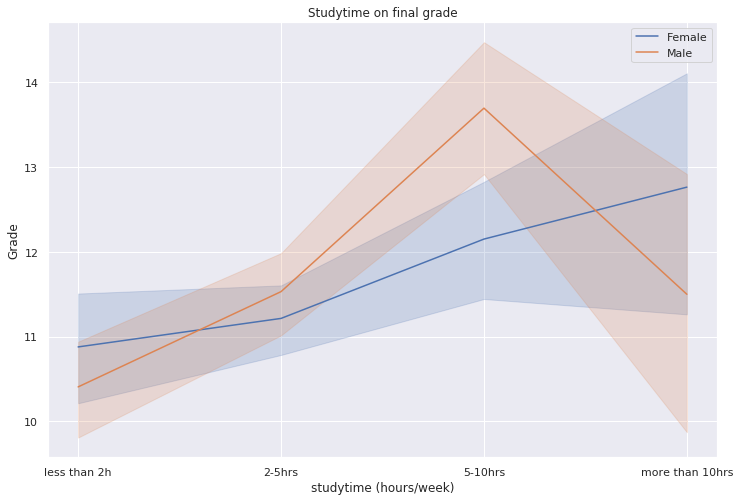

In [16]:
# Lineplot 
sorted_by_studytime_df = students.sort_values('studytime')
plt.figure(figsize=(12, 8))
sns.set()
sns.lineplot('studytime', 'G3', hue='sex', data=sorted_by_studytime_df)
plt.xlabel('studytime (hours/week)')
plt.ylabel('Grade')
plt.xticks([1,2,3,4], ('less than 2h', '2-5hrs', '5-10hrs', 'more than 10hrs'))
plt.legend(labels=['Female', 'Male'])
plt.title('Studytime on final grade')

From above plot, it shows that for female students, the more studytime spent, the better the grade is. However for male students, the grade is increasing with the studytime, but when the total weekly studytime is over than 10hs, their grades are declining. 

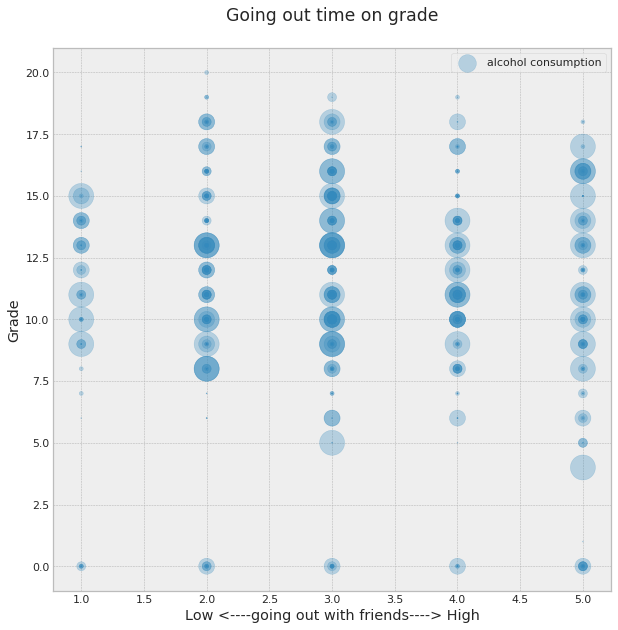

In [17]:
# Scatter plot 
plt.style.use("bmh")
fig, axes = plt.subplots(1, 1, figsize=(10, 10))
axes.scatter(students['goout'], students['G3'], alpha=0.3, s=students[['Walc']+['Dalc']]**4, label='alcohol consumption')

axes.set_xlabel('Low <----going out with friends----> High')
axes.set_ylabel('Grade')
axes.set_title('Going out time on grade\n')
axes.legend()
plt.show()

From this plot we can see that the students who go out rarely has the minimal fluctuations in grades but not the best grade group. The best group is going out on low level but still spend sometime with friends.

And all the groups the top grade students almost no alcohol consumption.

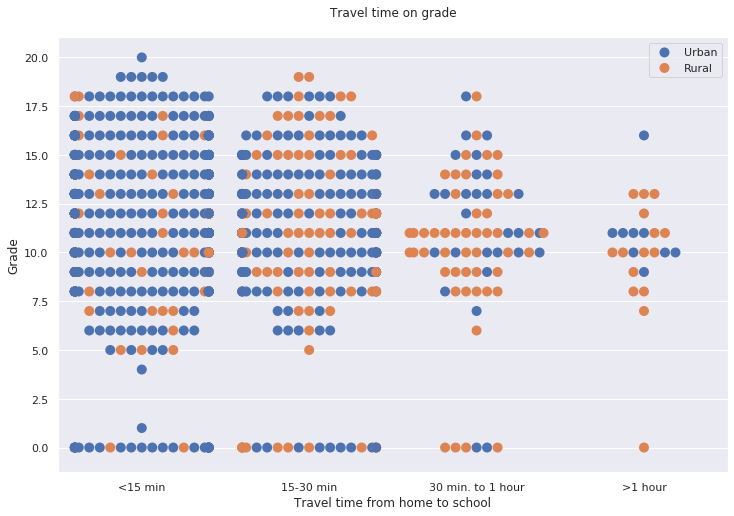

In [18]:
# swarmplot plot 
sns.set()
plt.figure(figsize=(12, 8))
sns.swarmplot('traveltime', 'G3', data=students, hue='address', size=10)

plt.xlabel('Travel time from home to school')
plt.ylabel('Grade')
plt.xticks([0,1,2,3], ('<15 min', '15-30 min', '30 min. to 1 hour', '>1 hour'))

plt.title('Travel time on grade\n')
plt.legend(labels=['Urban', 'Rural'])
plt.show()

From this plot we can see that the students who spent more time on the way to school have lower grades. And most of the students live near school and students who live in Rural are normally have more travel time than students live in Urban. 

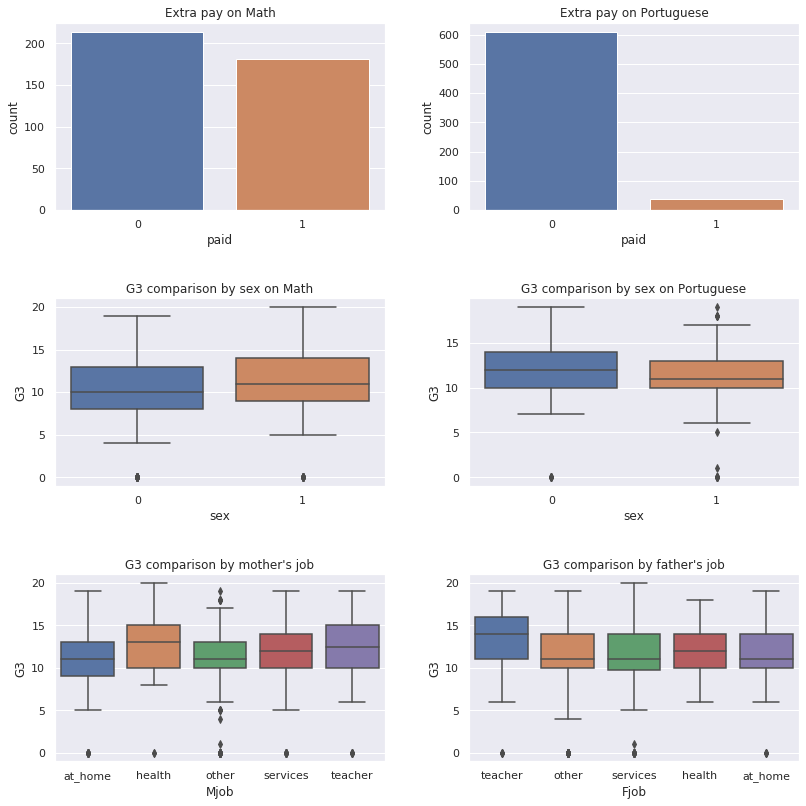

In [19]:
# comparisons

fig, ax = plt.subplots(3,2,figsize=(12, 12))
sns.set()

# First row of subplots 
# Compare the percentage of extra pay on Math and Portuguese
sns.countplot('paid', data=students.loc[students['subject']==0], ax=ax[0][0])
ax[0][0].set_title('Extra pay on Math') 
sns.countplot('paid', data=students.loc[students['subject']==1], ax=ax[0][1])
ax[0][1].set_title('Extra pay on Portuguese')


# Second row of subplots
# Compare Female and Male students performance on each subject
sns.boxplot('sex', 'G3', data=students.loc[students['subject']==0], ax=ax[1][0])
ax[1][0].set_title('G3 comparison by sex on Math') 
sns.boxplot('sex', 'G3', data=students.loc[students['subject']==1], ax=ax[1][1])
ax[1][1].set_title('G3 comparison by sex on Portuguese') 

# Third row of subplots
# Compare Mother's job and Father's job to students grade
sns.boxplot('Mjob', 'G3', data=students, ax=ax[2][0])
ax[2][0].set_title("G3 comparison by mother's job") 
sns.boxplot('Fjob', 'G3', data=students, ax=ax[2][1])
ax[2][1].set_title("G3 comparison by father's job") 


fig.tight_layout(pad=3.0)

plt.show()



Above plotttings show: 
1. For extra classes, parents paid more on Math and very little paid on Portuguese. 
2. Male students have higher performance on Math and Female students have higher performance on Portuguese. 
3. Mother's job is health related, their kids have best performance and Father's job is teacher related, their kids has best performance. 

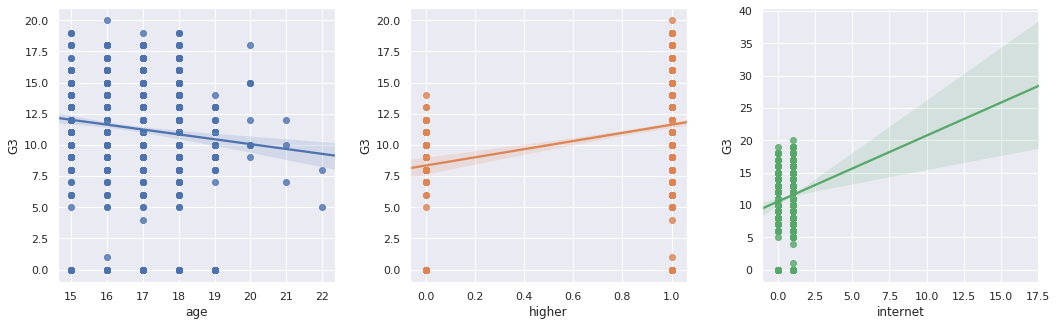

In [20]:
# Regplots to see other three features to final grade (Age/students willing to learn/internet availability)

fig, (axis1, axis2, axis3)  = plt.subplots(1, 3,figsize=(15,5))
sns.regplot(x='age', y='G3', data=students, ax=axis1)
sns.regplot(x='higher', y='G3', data=students, ax=axis2)
sns.regplot(x='internet', y='G3', data=students, ax=axis3)

fig.tight_layout(pad=2.0)


Above 3 plots show: 
1. The grade is decline with the age increasing. This is according with our normal recgonition. The highter the grade, the knowledge is more difficult. 
2. Students who want to take higher education get the better study performance. 
3. Internet doesn't affect learning, it helps with academic performance. 

### Data cleansing

In [21]:
"""
Since there are still 4 features dtype are objects, so we have to convert them to numerical data type. 
Because there is no ordinal relationship for each features, so we have to use one-hot-encoding method 
in pandas to convert categorical data to numerical data. 
"""

# use pd.concat to join the new columns with original students dataframe and drop the original 'Mjob' column 
students = pd.concat([students,pd.get_dummies(students['Mjob'], prefix='Mjob',dummy_na=False)],axis=1).drop(['Mjob'],axis=1)
# use pd.concat to join the new columns with students dataframe and drop the original 'Fjob' column 
students = pd.concat([students,pd.get_dummies(students['Fjob'], prefix='Fjob',dummy_na=False)],axis=1).drop(['Fjob'],axis=1)
# use pd.concat to join the new columns with students dataframe and drop the original 'reason' column 
students = pd.concat([students,pd.get_dummies(students['reason'], prefix='reason',dummy_na=False)],axis=1).drop(['reason'],axis=1)
# use pd.concat to join the new columns with students dataframe and drop the original 'guardian' column 
students = pd.concat([students,pd.get_dummies(students['guardian'], prefix='guardian',dummy_na=False)],axis=1).drop(['guardian'],axis=1)


In [22]:
# Check one-hot-encoding is applied correctly. 
students.columns

Index(['school', 'subject', 'sex', 'age', 'address', 'famsize', 'Pstatus',
       'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'schoolsup',
       'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet',
       'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health',
       'absences', 'G1', 'G2', 'G3', 'NPstatus', 'Mjob_at_home', 'Mjob_health',
       'Mjob_other', 'Mjob_services', 'Mjob_teacher', 'Fjob_at_home',
       'Fjob_health', 'Fjob_other', 'Fjob_services', 'Fjob_teacher',
       'reason_course', 'reason_home', 'reason_other', 'reason_reputation',
       'guardian_father', 'guardian_mother', 'guardian_other'],
      dtype='object')

In [23]:
# need to remove 'NPstatus' - added for plotting purpose only 
students.drop(['NPstatus'], axis=1, inplace=True)
students.columns

Index(['school', 'subject', 'sex', 'age', 'address', 'famsize', 'Pstatus',
       'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'schoolsup',
       'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet',
       'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health',
       'absences', 'G1', 'G2', 'G3', 'Mjob_at_home', 'Mjob_health',
       'Mjob_other', 'Mjob_services', 'Mjob_teacher', 'Fjob_at_home',
       'Fjob_health', 'Fjob_other', 'Fjob_services', 'Fjob_teacher',
       'reason_course', 'reason_home', 'reason_other', 'reason_reputation',
       'guardian_father', 'guardian_mother', 'guardian_other'],
      dtype='object')

In [24]:
students.info() # Data cleansing is done. No data missing and all the sample dtype are numerical. 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1044 entries, 0 to 648
Data columns (total 47 columns):
school               1044 non-null int64
subject              1044 non-null int64
sex                  1044 non-null int64
age                  1044 non-null int64
address              1044 non-null int64
famsize              1044 non-null int64
Pstatus              1044 non-null int64
Medu                 1044 non-null int64
Fedu                 1044 non-null int64
traveltime           1044 non-null int64
studytime            1044 non-null int64
failures             1044 non-null int64
schoolsup            1044 non-null int64
famsup               1044 non-null int64
paid                 1044 non-null int64
activities           1044 non-null int64
nursery              1044 non-null int64
higher               1044 non-null int64
internet             1044 non-null int64
romantic             1044 non-null int64
famrel               1044 non-null int64
freetime             1044 non-nul

## Machine Learning 
## 1. Predict students final grade (Regression) 
We’re going to build up a model to estimate students final scores for two two subjects (Math and Portugues) from various features of the student. The scores produced are numbers between 0 and 20, where higher scores indicate better study performance.

### Data preparation (training data & test data) 

In [25]:
# Separating features(X) and target(y)

X = students.drop('G3', axis=1)
y = students['G3']

# Splitting features and target datasets into: train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35) 

# Printing original Dataset
print(f"X.shape: {X.shape}, y.shape: {y.shape}")

# Printing splitted datasets
print(f"X_train.shape: {X_train.shape}, y_train.shape: {y_train.shape}")
print(f"X_test.shape: {X_test.shape}, y_test.shape: {y_test.shape}")

X.shape: (1044, 46), y.shape: (1044,)
X_train.shape: (678, 46), y_train.shape: (678,)
X_test.shape: (366, 46), y_test.shape: (366,)


### Estimators comparison 

In [26]:
# Training a model using multiple differents algorithms and comparing the results
# Cross-validation to get each estimator score
for Model in [LinearRegression, LinearSVR, Ridge, ElasticNet, Lasso, GradientBoostingRegressor]:
    model = Model()
    model.fit(X_train, y_train)
    predicted_values = model.predict(X_test)
    print(f"{Model}: {Model.__name__, cross_val_score(Model(), X, y).mean()}")
    print(f"MAE error(avg abs residual): {metrics.mean_absolute_error(y_test, predicted_values)}")
    print(f"MSE error: {metrics.mean_squared_error(y_test, predicted_values)}")
    print(f"RMSE error: {np.sqrt(metrics.mean_squared_error(y_test, predicted_values))}")
    print(f"R2 Score: {metrics.r2_score(y_test, predicted_values)}\n")
    

<class 'sklearn.linear_model.base.LinearRegression'>: ('LinearRegression', 0.7960502272121293)
MAE error(avg abs residual): 1.0301590382727117
MSE error: 2.2038971074943334
RMSE error: 1.484552830819548
R2 Score: 0.827313265716243

<class 'sklearn.svm.classes.LinearSVR'>: ('LinearSVR', 0.8210972348569469)
MAE error(avg abs residual): 0.8521205562580219
MSE error: 1.8899150760148538
RMSE error: 1.3747418215850036
R2 Score: 0.8519153814210074

<class 'sklearn.linear_model.ridge.Ridge'>: ('Ridge', 0.7974638467095009)
MAE error(avg abs residual): 1.0284754673278265
MSE error: 2.19886610556758
RMSE error: 1.4828574124195422
R2 Score: 0.8277074707315099

<class 'sklearn.linear_model.coordinate_descent.ElasticNet'>: ('ElasticNet', 0.8139834142413833)
MAE error(avg abs residual): 0.8478579081982429
MSE error: 1.9017562284450613
RMSE error: 1.379041779078887
R2 Score: 0.8509875658998673

<class 'sklearn.linear_model.coordinate_descent.Lasso'>: ('Lasso', 0.8133106201059691)
MAE error(avg abs res

`Based on the cross-validation score, we would choose Gradient Boosting Regressor as our predict estimator.` 

### Ensemble Decision Tree - Gradient Boosting Regressor 
 

Ref: https://scikit-learn.org/stable/auto_examples/ensemble/plot_gradient_boosting_regression.html#sphx-glr-auto-examples-ensemble-plot-gradient-boosting-regression-py

In [27]:
# Tuning the hyper-parameter 

param_grid={'n_estimators':[100,500], 
            'learning_rate': [0.1,0.05,0.02],
            'max_depth':[4], 
            'min_samples_leaf':[3], 
            'max_features':[1.0] } 

n_jobs=4

def GradientBooster(param_grid, n_jobs):
    estimator = GradientBoostingRegressor() 
    classifier = GridSearchCV(estimator=estimator, cv=5, param_grid=param_grid, 
    n_jobs=n_jobs)
    classifier.fit(X_train, y_train)
    print(classifier.best_estimator_)
    
GradientBooster(param_grid, n_jobs)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.05, loss='ls', max_depth=4,
                          max_features=1.0, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=3, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)


Printing MAE error(avg abs residual): 0.8709525930192266
Printing MSE error: 1.663168928762536
Printing RMSE error: 1.2896390691827446
R2 Score: 0.8696821145172471


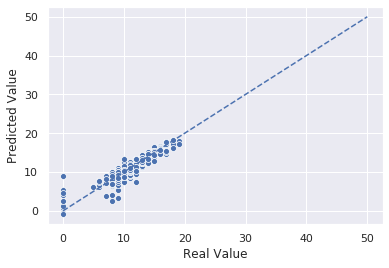

In [28]:
# Train GBR with optimized parameters  

clf = GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.05, loss='ls', max_depth=4,
                          max_features=1.0, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=3, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False) 

clf.fit(X_train, y_train)

# Predicting the results for our test dataset
predicted_values = clf.predict(X_test)

print(f"Printing MAE error(avg abs residual): {metrics.mean_absolute_error(y_test, predicted_values)}")
print(f"Printing MSE error: {metrics.mean_squared_error(y_test, predicted_values)}")
print(f"Printing RMSE error: {np.sqrt(metrics.mean_squared_error(y_test, predicted_values))}")
print(f"R2 Score: {metrics.r2_score(y_test, predicted_values)}")

# Plotting differenct between real and predicted values
sns.scatterplot(y_test, predicted_values)
plt.plot([0, 50], [0, 50], '--')
plt.xlabel('Real Value')
plt.ylabel('Predicted Value')
plt.show()


Text(0, 0.5, 'Deviance')

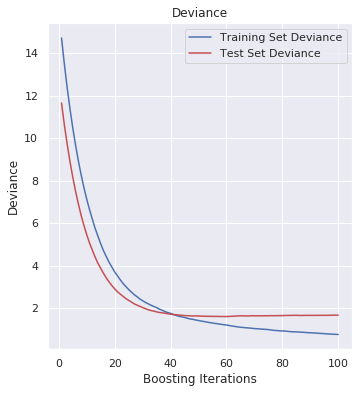

In [29]:
# Plot training deviance

# compute test set deviance
test_score = np.zeros((100,), dtype=np.float64)

for i, y_pred in enumerate(clf.staged_predict(X_test)):
    test_score[i] = clf.loss_(y_test, y_pred)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Deviance')
plt.plot(np.arange(100) + 1, clf.train_score_, 'b-',
         label='Training Set Deviance')
plt.plot(np.arange(100) + 1, test_score, 'r-',
         label='Test Set Deviance')
plt.legend(loc='upper right')
plt.xlabel('Boosting Iterations')
plt.ylabel('Deviance')


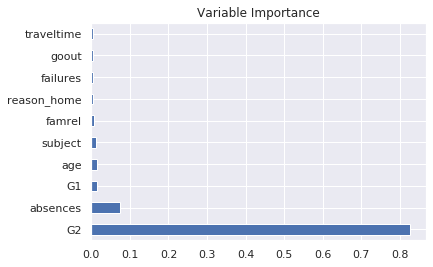

In [30]:
# Plot feature importance
(pd.Series(clf.feature_importances_, index=X.columns)
   .nlargest(10)
   .plot(kind='barh')) 

plt.title('Variable Importance')
plt.show()

From variable importance plotting, we can see grade related features like G2/G1 affect prediction greatly. 
### Therefore, we are going to remove all grade related `G1 & G2` from the X and see how the model performance is. 

In [31]:
# Separating features(X) and target(y)

X = students.drop(['G3', 'G2', 'G1'], axis=1)
y = students['G3']

In [32]:
# Splitting features and target datasets into: train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35)

# Printing original Dataset
print(f"X.shape: {X.shape}, y.shape: {y.shape}")

# Printing splitted datasets
print(f"X_train.shape: {X_train.shape}, y_train.shape: {y_train.shape}")
print(f"X_test.shape: {X_test.shape}, y_test.shape: {y_test.shape}")

X.shape: (1044, 44), y.shape: (1044,)
X_train.shape: (678, 44), y_train.shape: (678,)
X_test.shape: (366, 44), y_test.shape: (366,)


In [33]:
# Training a model using multiple differents algorithms and comparing the results
# Cross-validation to get each estimator score

for Model in [LinearRegression, LinearSVR, Ridge, ElasticNet, Lasso, GradientBoostingRegressor]:
    model = Model()
    model.fit(X_train, y_train)
    predicted_values = model.predict(X_test)
    print(f"{Model}: {Model.__name__, cross_val_score(Model(), X, y).mean()}")
    print(f"MAE error(avg abs residual): {metrics.mean_absolute_error(y_test, predicted_values)}")
    print(f"MSE error: {metrics.mean_squared_error(y_test, predicted_values)}")
    print(f"RMSE error: {np.sqrt(metrics.mean_squared_error(y_test, predicted_values))}")
    print(f"R2 Score: {metrics.r2_score(y_test, predicted_values)}\n")
 

<class 'sklearn.linear_model.base.LinearRegression'>: ('LinearRegression', -0.038303797555399664)
MAE error(avg abs residual): 2.4277430466615435
MSE error: 11.30483863716487
RMSE error: 3.3622668896393204
R2 Score: 0.2078428583863109

<class 'sklearn.svm.classes.LinearSVR'>: ('LinearSVR', 0.14708073323925622)
MAE error(avg abs residual): 2.457867031487888
MSE error: 12.168810125400137
RMSE error: 3.488382164471109
R2 Score: 0.1473023052194402

<class 'sklearn.linear_model.ridge.Ridge'>: ('Ridge', -0.025894500471492183)
MAE error(avg abs residual): 2.4253817234255775
MSE error: 11.291956460482984
RMSE error: 3.3603506454658842
R2 Score: 0.20874554338568252

<class 'sklearn.linear_model.coordinate_descent.ElasticNet'>: ('ElasticNet', 0.01821092860931328)
MAE error(avg abs residual): 2.651934847160089
MSE error: 13.278904045474276
RMSE error: 3.644023057758317
R2 Score: 0.06951536328488461

<class 'sklearn.linear_model.coordinate_descent.Lasso'>: ('Lasso', -0.04282799273697909)
MAE error

Without these 3 features: grades G1 & G2 & failures, the Estimator scores are decline dramastically. 
### Compare with others, Ensemble Decision Tree - `Gradient Boosting Regressor` is still the best estimator to choose. 

In [34]:
# Tuning the hyper-parameter 

param_grid={'n_estimators':[100,500], 
            'learning_rate': [0.1,0.05,0.02],
            'max_depth':[4], 
            'min_samples_leaf':[3], 
            'max_features':[1.0] } 

n_jobs=4

def GradientBooster(param_grid, n_jobs):
    estimator = GradientBoostingRegressor() 
    classifier = GridSearchCV(estimator=estimator, cv=5, param_grid=param_grid, 
    n_jobs=n_jobs)
    classifier.fit(X_train, y_train)
    print(classifier.best_estimator_)
    
GradientBooster(param_grid, n_jobs)



GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.05, loss='ls', max_depth=4,
                          max_features=1.0, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=3, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)


Printing MAE error(avg abs residual): 2.221469585696418
Printing MSE error: 9.185158315052739
Printing RMSE error: 3.0307026107905637
R2 Score: 0.3563739395446913


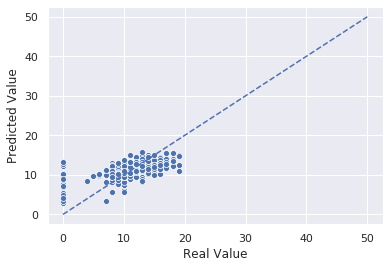

In [35]:
# train GBR with parameters optimized 

clf = GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.05, loss='ls', max_depth=4,
                          max_features=1.0, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=3, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

clf.fit(X_train, y_train)

# Predicting the results for our test dataset
predicted_values = clf.predict(X_test)

print(f"Printing MAE error(avg abs residual): {metrics.mean_absolute_error(y_test, predicted_values)}")
print(f"Printing MSE error: {metrics.mean_squared_error(y_test, predicted_values)}")
print(f"Printing RMSE error: {np.sqrt(metrics.mean_squared_error(y_test, predicted_values))}")
print(f"R2 Score: {metrics.r2_score(y_test, predicted_values)}")

# Plotting differenct between real and predicted values
sns.scatterplot(y_test, predicted_values)
plt.plot([0, 50], [0, 50], '--')
plt.xlabel('Real Value')
plt.ylabel('Predicted Value')
plt.show()

Text(0, 0.5, 'Deviance')

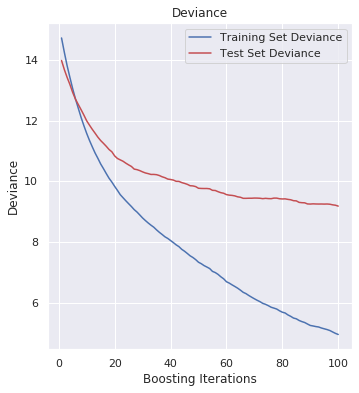

In [36]:
# Plot training deviance

# compute test set deviance
test_score = np.zeros((100,), dtype=np.float64)

for i, y_pred in enumerate(clf.staged_predict(X_test)):
    test_score[i] = clf.loss_(y_test, y_pred)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Deviance')
plt.plot(np.arange(100) + 1, clf.train_score_, 'b-',
         label='Training Set Deviance')
plt.plot(np.arange(100) + 1, test_score, 'r-',
         label='Test Set Deviance')
plt.legend(loc='upper right')
plt.xlabel('Boosting Iterations')
plt.ylabel('Deviance')



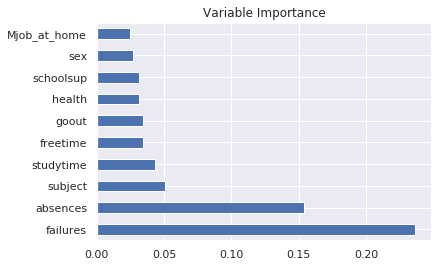

In [37]:
# Plot feature importance
(pd.Series(clf.feature_importances_, index=X.columns)
   .nlargest(10)
   .plot(kind='barh')) 

plt.title('Variable Importance')
plt.show()

R2 score is only 0.36, means all the features have only 36% effection to final grade, which is a week effect size. So for prediction purpose, it is not a good model. we still need G1 and G2 features for training the model otherwise the prediction would be have a large deviance. 

## Machine Learning
## 2. Predict if my child has a girlfriend/boyfriend (classcification) 
Students in youth treason, parents sometimes worry very much about their children's early love. The significance of building this predictive model is to help parents judge whether their children have early love in the school. 
0 - No, 1- Yes

### Data preparation (training data & test data) 

In [38]:
# Separating features(X) and target(y)

X = students.drop(['romantic'], axis=1)
y = students['romantic']

# Splitting features and target datasets into: train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

# Printing original Dataset
print(f"X.shape: {X.shape}, y.shape: {y.shape}")

# Printing splitted datasets
print(f"X_train.shape: {X_train.shape}, y_train.shape: {y_train.shape}")
print(f"X_test.shape: {X_test.shape}, y_test.shape: {y_test.shape}")

X.shape: (1044, 46), y.shape: (1044,)
X_train.shape: (730, 46), y_train.shape: (730,)
X_test.shape: (314, 46), y_test.shape: (314,)


In [39]:
# Training a model using multiple differents algorithms and comparing the results
# Cross-validation to get each estimator score

for Model in [LogisticRegression, LinearSVC, neighbors.KNeighborsClassifier, SVC, GradientBoostingClassifier]:
    model = Model()
    model.fit(X_train, y_train)
    predicted_values = model.predict(X_test)
    cv = ShuffleSplit(n_splits=5)
    print(f"{Model}: {Model.__name__, cross_val_score(Model(), X, y, cv=cv)}")
    print('Classification Report')
    print(classification_report(y_test, predicted_values))


<class 'sklearn.linear_model.logistic.LogisticRegression'>: ('LogisticRegression', array([0.62857143, 0.72380952, 0.68571429, 0.60952381, 0.74285714]))
Classification Report
              precision    recall  f1-score   support

           0       0.63      0.86      0.73       187
           1       0.56      0.27      0.36       127

    accuracy                           0.62       314
   macro avg       0.59      0.56      0.54       314
weighted avg       0.60      0.62      0.58       314

<class 'sklearn.svm.classes.LinearSVC'>: ('LinearSVC', array([0.7047619 , 0.62857143, 0.67619048, 0.4952381 , 0.73333333]))
Classification Report
              precision    recall  f1-score   support

           0       0.65      0.79      0.72       187
           1       0.56      0.39      0.46       127

    accuracy                           0.63       314
   macro avg       0.61      0.59      0.59       314
weighted avg       0.62      0.63      0.61       314

<class 'sklearn.neighbors.

### From above cross validation score, we can see `GradientBoostingClassifier` is the best choice. 

In [40]:
# Tuning the hyper-parameter 

param_grid={'n_estimators':[100,500], 
            'learning_rate': [0.1,0.05,0.02],
            'max_depth':[4], 
            'min_samples_leaf':[3], 
            'max_features':[1.0] } 

n_jobs=4

def GradientBooster(param_grid, n_jobs):
    estimator = GradientBoostingClassifier() 
    classifier = GridSearchCV(estimator=estimator, cv=5, param_grid=param_grid, 
    n_jobs=n_jobs)
    classifier.fit(X_train, y_train)
    print(classifier.best_estimator_)
    
GradientBooster(param_grid, n_jobs)


GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.05, loss='deviance', max_depth=4,
                           max_features=1.0, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=3, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=500,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)


In [41]:

clf = GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=4,
                           max_features=1.0, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=3, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=500,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

clf.fit(X_train, y_train)

# Predicting the results for our test dataset
predicted_values = clf.predict(X_test)
print('Classification Report')
print(classification_report(y_test, predicted_values))
print('Confusion Matrix')
print(confusion_matrix(y_test, predicted_values))


Classification Report
              precision    recall  f1-score   support

           0       0.73      0.90      0.81       187
           1       0.78      0.52      0.62       127

    accuracy                           0.75       314
   macro avg       0.76      0.71      0.72       314
weighted avg       0.75      0.75      0.73       314

Confusion Matrix
[[168  19]
 [ 61  66]]


`Although the accuracy of the model is not very high, it can somehow assist parents to prove their guess in a sense as an auxiliary tool.`